In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [1]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold



from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, zero_one_loss, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn import svm

from sklearn.feature_selection import SelectPercentile

from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, SGDRegressor, LinearRegression

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from collections import defaultdict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

### Область работы 2 (поиск  модели .... )

In [3]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок !!!

In [4]:
df = pd.read_csv(path_train)
df

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,0.0,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.478408,...,-1.341446,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553,-0.141322
404,5250000,0.405623,0.0,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.478408,...,-0.144745,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976,-0.141322
405,5950000,0.405623,0.0,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.478408,...,-0.734544,-0.263991,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372,-0.141322
406,4319000,0.405623,0.0,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,1.307431,...,-0.282323,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075,-0.141322


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

In [6]:
df.describe() #в первой корлонке одни 0, очевидно надо убрать

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.643597e+06,-0.030652,0.0,-0.021898,-0.004470,-0.044734,-0.015345,-0.037179,0.005930,-0.005686,...,-0.046552,-0.022184,-0.042466,0.017890,-0.043530,-0.039454,-0.038181,-0.048110,-0.025252,-0.044926
std,1.711368e+06,1.031893,0.0,1.019428,0.974612,0.969756,0.996282,1.001595,0.976837,1.007006,...,0.991383,1.020601,0.995270,1.016147,0.900616,0.975409,1.031259,1.008422,1.001805,0.913917
min,1.750000e+06,-2.465344,0.0,-1.224688,-1.780233,-2.633407,-0.734539,-1.614530,-0.570187,-4.050087,...,-1.705711,-2.319351,-2.665004,-1.406286,-0.219265,-0.554035,-5.000645,-1.789595,-1.705457,-3.418780
25%,3.430000e+06,0.405623,0.0,-0.673496,-0.837351,-0.223185,-0.734539,-0.745125,-0.570187,-0.478408,...,-0.881357,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,-0.126718,-0.896013,-0.887341,-0.141322
50%,4.270000e+06,0.405623,0.0,-0.252391,0.032263,-0.223185,-0.734539,-0.300045,-0.570187,-0.478408,...,-0.072463,-0.263991,0.047278,-0.091662,-0.219265,-0.554035,-0.126718,-0.047954,-0.050893,-0.141322
75%,5.600000e+06,0.405623,0.0,0.312075,0.775898,-0.223185,1.361397,0.454055,1.421812,1.307431,...,0.755884,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.006287,0.787204,0.798591,-0.141322
max,1.141000e+07,0.405623,0.0,8.604753,1.732550,13.826353,1.361397,5.096263,3.413810,3.093270,...,1.745647,7.957450,4.115701,1.222962,4.560702,1.804941,13.021551,1.732996,1.771548,3.136137


In [7]:
df = df.drop("1", axis=1)

In [8]:
df

,price,0,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,-0.465315,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,-0.465315,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,-0.465315,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,-0.465315,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,-0.465315,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.478408,-0.465315,...,-1.341446,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553,-0.141322
404,5250000,0.405623,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.478408,2.149083,...,-0.144745,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976,-0.141322
405,5950000,0.405623,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.478408,2.149083,...,-0.734544,-0.263991,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372,-0.141322
406,4319000,0.405623,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,1.307431,-0.465315,...,-0.282323,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075,-0.141322


In [9]:
X = df.drop(['price'],axis=1)
y = df['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)# соразмерны
print(y_test.shape)

(285, 28)
(285,)
(123, 28)
(123,)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

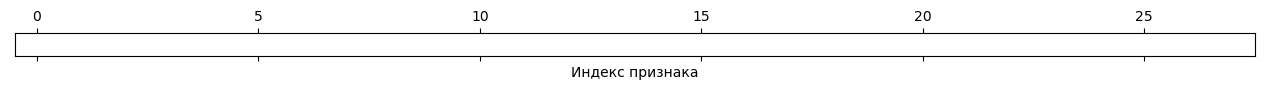

In [11]:
ths = (.9 * (1 - .9))
df_var = VarianceThreshold(threshold = ths)
df_var.fit_transform(X_train)
mask = df_var.get_support()


plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака")
df_var.get_support()

In [12]:

select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (285, 28)
форма массива X_train_selected: (285, 14)


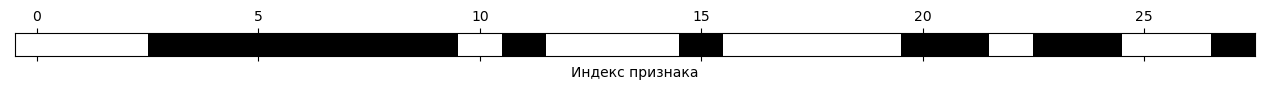

In [13]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

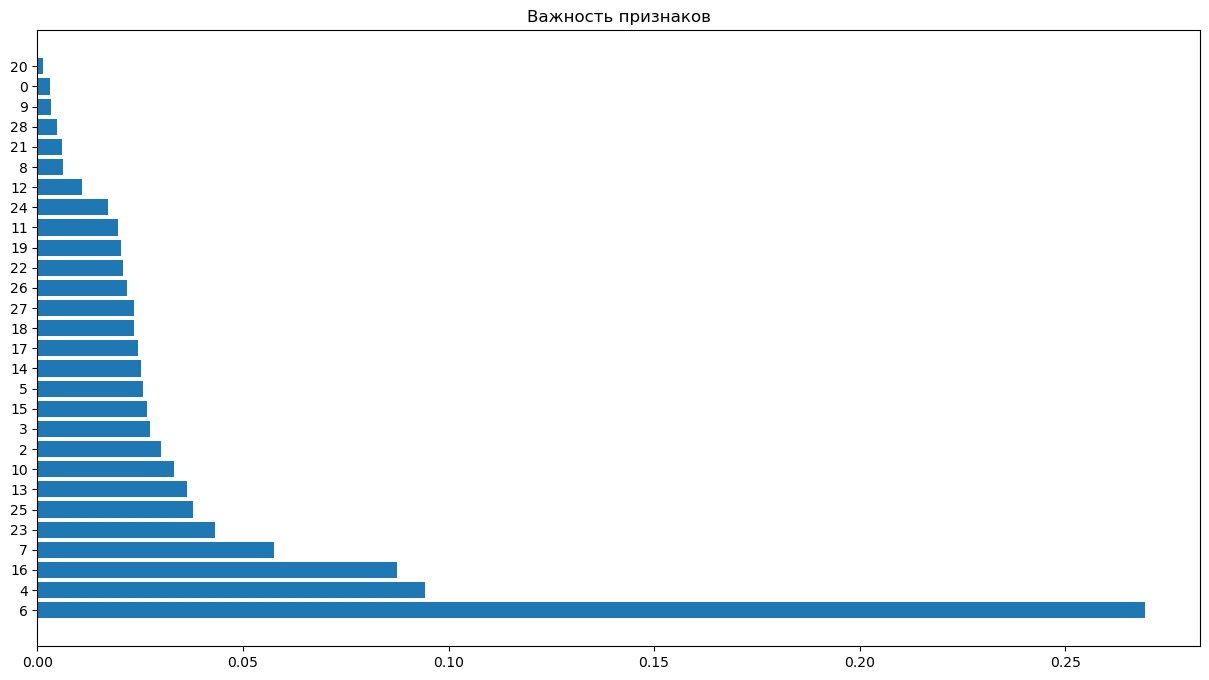

In [14]:

rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train,y_train)

plt.figure(figsize=(15,8))
feature_names = X.columns.values
#importance = rfc.feature_importances_

importance = np.sort(rfc.feature_importances_)
importance_name = np.argsort(rfc.feature_importances_)

plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

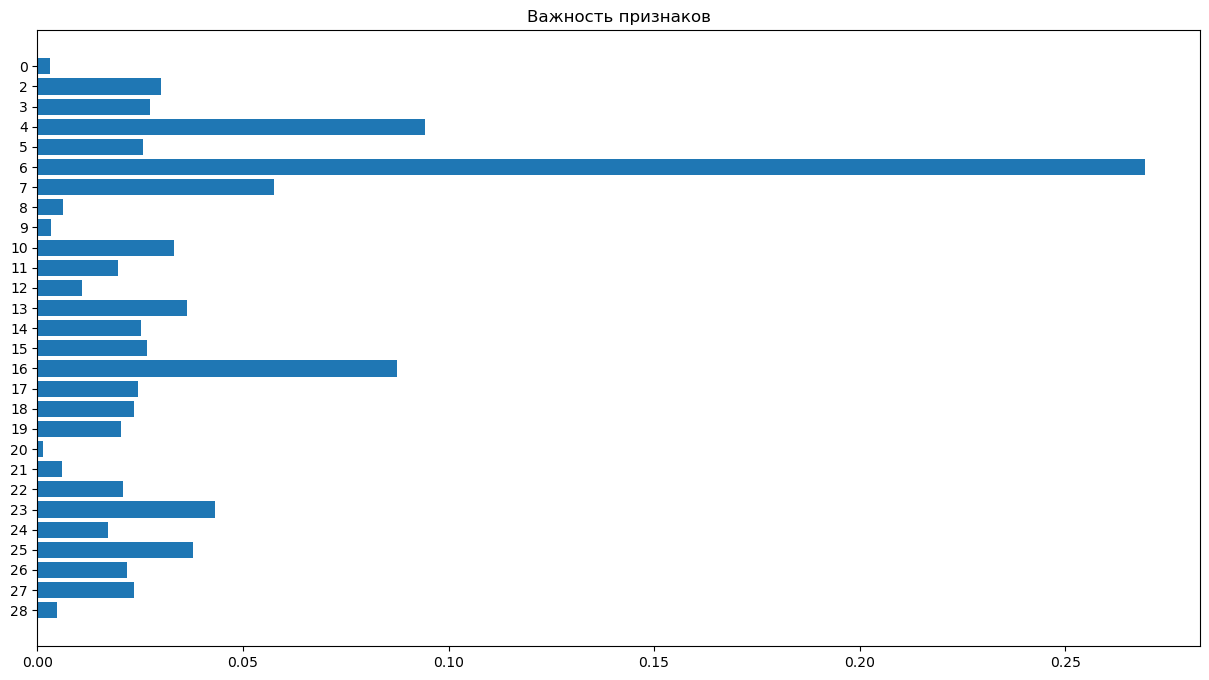

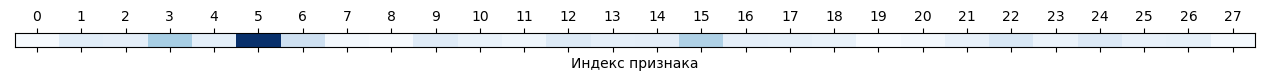

In [15]:
importance = rfc.feature_importances_

plt.figure(figsize=(15,8))
plt.barh(width=importance, y=feature_names)
plt.gca().invert_yaxis()
plt.title("Важность признаков")
plt.show()

mask = importance
plt.matshow( mask.reshape(1,-1), cmap = 'Blues', aspect=0.3)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [16]:
#таким образом наиболее важными являются 6, 4,16

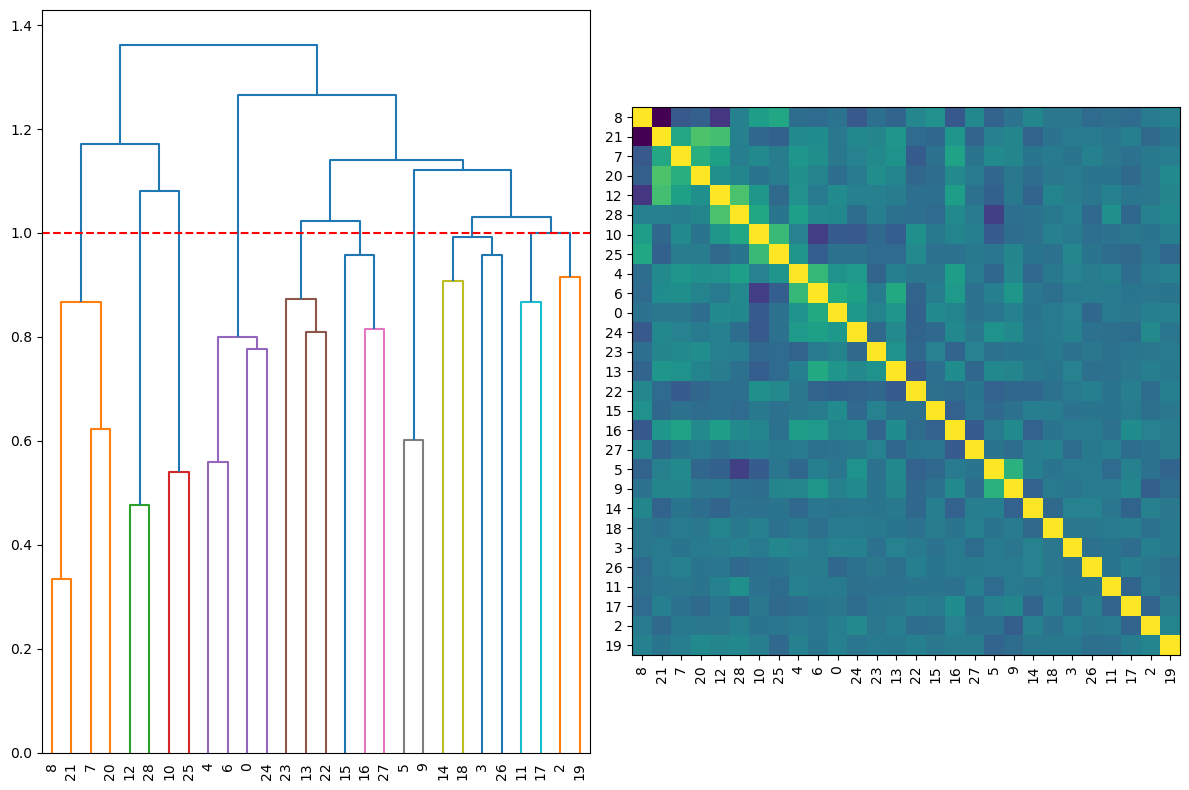

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = feature_names,
    ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.axhline(y=1, color='r', linestyle='--')


# distance_matrix = 1 - np.abs(corr)
# dist_linkage = hierarchy.ward(squareform(distance_matrix))
# dendro = hierarchy.dendrogram(
#     dist_linkage, 
#     ax=ax2, leaf_rotation=90
# )

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(feature_names[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(feature_names[dendro["leaves"]])
fig.tight_layout()
plt.show()

In [18]:
feature_names = X.columns.values
feature_names

array(['0', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28'], dtype=object)

In [19]:
columns_to_drop = ['8', '21', '20', '28', '0', '24', '22', '10', '15', '27', '9', '18', '26', '11', '19']
df_new = df.drop(columns_to_drop, axis=1)

In [20]:
df_new

,price,2,3,4,5,6,7,12,13,14,16,17,23,25
0,5320000,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.929397,1.517692,-0.142607,1.472618,-0.280781,-0.219265,-0.126718
1,3465000,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.929397,-0.805741,0.307755,-0.679063,1.311928,-0.219265,-0.126718
2,3500000,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,0.224410,-0.805741,-1.033235,-0.679063,0.470806,-0.219265,-0.126718
3,3570000,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,-0.929397,-0.805741,-1.119627,-0.679063,-1.039726,-0.219265,0.417348
4,4130000,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,0.224410,-0.805741,0.232269,1.472618,1.747297,-0.219265,-0.108582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,0.224410,-0.805741,2.948326,1.472618,1.491291,-0.219265,-0.126718
404,5250000,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,0.224410,0.355976,1.138751,-0.679063,-0.269301,-0.219265,-0.126718
405,5950000,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.929397,1.517692,-0.653206,-0.679063,-1.273605,-0.219265,-0.126718
406,4319000,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,-0.929397,-0.805741,0.330239,-0.679063,1.109630,-0.219265,0.195188


In [21]:
feature_names = df_new.columns.values
feature_names

array(['price', '2', '3', '4', '5', '6', '7', '12', '13', '14', '16',
       '17', '23', '25'], dtype=object)

In [22]:
X = df_new.drop(['price'],axis=1)
y = df_new['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)# соразмерны
print(y_test.shape)

(285, 13)
(285,)
(123, 13)
(123,)


In [30]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    KNeighborsRegressor())])

kfold = KFold(n_splits=5, shuffle=True, random_state = 42)

p = np.arange(1,5)
n_neighbors = [2,5,10,20,50,100]
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler()]
#weights = ['uniform','distance'] weights=distance использовать не буду, т.к с ним score train=1, т.е идет переобучение
param_grid = {
    'preprocessing': scaling,
    'regressor': [KNeighborsRegressor()],
    'regressor__n_neighbors': n_neighbors,
    'regressor__p': p,
}


grid = RandomizedSearchCV(pipe,param_grid, cv=kfold,verbose=4,return_train_score=True)
grid.fit(X_train,y_train)
grid

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=20, regressor__p=4;, score=(train=0.475, test=0.326) total time=   0.0s
[CV 2/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=20, regressor__p=4;, score=(train=0.503, test=0.374) total time=   0.0s
[CV 3/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=20, regressor__p=4;, score=(train=0.461, test=0.410) total time=   0.0s
[CV 4/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=20, regressor__p=4;, score=(train=0.449, test=0.360) total time=   0.0s
[CV 5/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=20, regressor__p=4;, score=(train=0.451, test=0.425) total time=   0.0s
[CV 1/5] END preprocessing=StandardScaler(), regressor=KNeighborsRegressor(), regres

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                             ('regressor',
                                              KNeighborsRegressor())]),
                   param_distributions={'preprocessing': [MinMaxScaler(),
                                                          StandardScaler(),
                                                          RobustScaler()],
                                        'regressor': [KNeighborsRegressor(n_neighbors=10,
                                                                          p=3)],
                                        'regressor__n_neighbors': [2, 5, 10, 20,
                                                                   50, 100],
                                        'regressor__p': array([1, 2, 3, 4])},
                   return_train_score=True, verbose=4)

In [43]:
knn_pr = grid.predict(X_test)
mape = mean_absolute_percentage_error(y_test, knn_pr)
print(grid.best_params_)
print(grid.best_score_)
mape

{'regressor__p': 3, 'regressor__n_neighbors': 10, 'regressor': KNeighborsRegressor(n_neighbors=10, p=3), 'preprocessing': StandardScaler()}
0.5512558850719642


0.22491030568469236

In [32]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,1,9,3,6,2,8,4,5,0,7
mean_fit_time,0.004629,0.003577,0.004999,0.004235,0.004195,0.00555,0.005366,0.007638,0.004532,0.011877
std_fit_time,0.000655,0.000507,0.001072,0.000537,0.000308,0.001348,0.000915,0.000673,0.001298,0.00579
mean_score_time,0.007575,0.003327,0.003462,0.003226,0.002928,0.00262,0.003734,0.006635,0.007842,0.003588
std_score_time,0.000271,0.000296,0.001172,0.000313,0.000661,0.000663,0.000198,0.000854,0.000719,0.000863
param_regressor__p,3,1,1,2,2,1,2,4,4,1
param_regressor__n_neighbors,10,10,5,5,50,2,2,5,20,2
param_regressor,"KNeighborsRegressor(n_neighbors=10, p=3)","KNeighborsRegressor(n_neighbors=10, p=3)","KNeighborsRegressor(n_neighbors=10, p=3)","KNeighborsRegressor(n_neighbors=10, p=3)","KNeighborsRegressor(n_neighbors=10, p=3)","KNeighborsRegressor(n_neighbors=10, p=3)","KNeighborsRegressor(n_neighbors=10, p=3)","KNeighborsRegressor(n_neighbors=10, p=3)","KNeighborsRegressor(n_neighbors=10, p=3)","KNeighborsRegressor(n_neighbors=10, p=3)"
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),RobustScaler()
params,"{'regressor__p': 3, 'regressor__n_neighbors': ...","{'regressor__p': 1, 'regressor__n_neighbors': ...","{'regressor__p': 1, 'regressor__n_neighbors': ...","{'regressor__p': 2, 'regressor__n_neighbors': ...","{'regressor__p': 2, 'regressor__n_neighbors': ...","{'regressor__p': 1, 'regressor__n_neighbors': ...","{'regressor__p': 2, 'regressor__n_neighbors': ...","{'regressor__p': 4, 'regressor__n_neighbors': ...","{'regressor__p': 4, 'regressor__n_neighbors': ...","{'regressor__p': 1, 'regressor__n_neighbors': ..."
split0_test_score,0.528561,0.548223,0.478442,0.422801,0.442054,0.33132,0.321026,0.500929,0.32592,0.394364


In [33]:
print('Правильность на обучающем наборе: {:.3f}'.format(grid.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(grid.score(X_test, y_test)))

Правильность на обучающем наборе: 0.637
Правильность на тестовом наборе: 0.471


In [34]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    LinearRegression())])
kfold = KFold(n_splits=10, shuffle=True, random_state = 42)
scores='neg_mean_absolute_percentage_error'
fit_intercept=[True,False]
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler()] 
param_grid = {
    'preprocessing': scaling,
    'regressor': [LinearRegression(n_jobs=-1)],
    'regressor__fit_intercept': fit_intercept,
}


LR = GridSearchCV(pipe,param_grid, cv=kfold,return_train_score=True,scoring=scores)
LR.fit(X_train,y_train)
LR

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'preprocessing': [MinMaxScaler(), StandardScaler(),
                                           RobustScaler()],
                         'regressor': [LinearRegression(n_jobs=-1)],
                         'regressor__fit_intercept': [True, False]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [35]:
print(LR.best_params_)
print(LR.best_score_)
LR_result = pd.DataFrame(LR.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
LR_result

{'preprocessing': RobustScaler(), 'regressor': LinearRegression(n_jobs=-1), 'regressor__fit_intercept': True}
-0.18065043395533967


,4,2,0,1,5,3
mean_fit_time,0.007262,0.004656,0.008645,0.004004,0.006565,0.004294
std_fit_time,0.000759,0.000573,0.012807,0.000191,0.000884,0.000492
mean_score_time,0.001622,0.001821,0.00194,0.001914,0.001415,0.0017
std_score_time,0.000508,0.000606,0.000555,0.000307,0.00044,0.000459
param_preprocessing,RobustScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),StandardScaler()
param_regressor,LinearRegression(n_jobs=-1),LinearRegression(n_jobs=-1),LinearRegression(n_jobs=-1),LinearRegression(n_jobs=-1),LinearRegression(n_jobs=-1),LinearRegression(n_jobs=-1)
param_regressor__fit_intercept,True,True,True,False,False,False
params,"{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': StandardScaler(), 'regressor..."
split0_test_score,-0.202813,-0.202813,-0.202813,-0.203218,-0.543784,-1.174937
split1_test_score,-0.155241,-0.155241,-0.155241,-0.154689,-0.456913,-0.987506


In [38]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    SGDRegressor())])
kfold = KFold(n_splits=5, shuffle=True, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler()] 
penalty=['l2', 'l1','elasticnet', None]
alpha=[0.0001,0.001,0.01,0.1,1.0]
param_grid = {'preprocessing': scaling,'regressor': [SGDRegressor()],'regressor__penalty': penalty,'regressor__alpha': alpha}
SGD = GridSearchCV(pipe,param_grid, cv=kfold,return_train_score=True,verbose=1)
SGD.fit(X_train,y_train)
SGD

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('regressor', SGDRegressor())]),
             param_grid={'preprocessing': [MinMaxScaler(), StandardScaler(),
                                           RobustScaler()],
                         'regressor': [SGDRegressor(alpha=0.1)],
                         'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'regressor__penalty': ['l2', 'l1', 'elasticnet',
                                                None]},
             return_train_score=True, verbose=1)

In [39]:
print(SGD.best_params_)
print(SGD.best_score_)
SGD_result = pd.DataFrame(SGD.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
SGD_result

{'preprocessing': StandardScaler(), 'regressor': SGDRegressor(alpha=0.1), 'regressor__alpha': 0.1, 'regressor__penalty': 'l2'}
0.5744933346830671


,32,54,52,9,1,5,34,15,0,6,...,45,42,38,36,14,58,12,56,18,16
mean_fit_time,0.003985,0.009618,0.008703,0.020395,0.01858,0.019459,0.005266,0.015139,0.016463,0.017342,...,0.006559,0.007743,0.003781,0.003437,0.005419,0.00625,0.00481,0.006685,0.003906,0.003373
std_fit_time,0.000458,0.000605,0.000428,0.003955,0.001557,0.002441,0.000414,0.002642,0.002463,0.00392,...,0.000386,0.001591,0.000467,0.000366,0.000615,0.000254,0.000405,0.001342,0.000472,0.000457
mean_score_time,0.001524,0.003032,0.00196,0.001559,0.001868,0.001859,0.001373,0.002066,0.00202,0.00193,...,0.001646,0.001642,0.001121,0.001462,0.001825,0.001411,0.001878,0.00172,0.001511,0.001905
std_score_time,0.000445,0.000404,0.000351,0.000443,0.000269,0.000315,0.000368,0.000126,0.000595,0.000148,...,0.000259,0.000241,0.000233,0.000565,0.000413,0.000481,0.00046,0.000601,0.000459,0.000494
param_preprocessing,StandardScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler()
param_regressor,SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),...,SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1),SGDRegressor(alpha=0.1)
param_regressor__alpha,0.1,0.1,0.1,0.01,0.0001,0.001,0.1,0.1,0.0001,0.001,...,0.001,0.0001,1.0,1.0,0.1,1.0,0.1,1.0,1.0,1.0
param_regressor__penalty,l2,elasticnet,l2,l1,l1,l1,elasticnet,None,l2,elasticnet,...,l1,elasticnet,elasticnet,l2,elasticnet,elasticnet,l2,l2,elasticnet,l2
params,"{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...",...,"{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':..."
split0_test_score,0.592507,0.617518,0.629466,0.57811,0.57675,0.577152,0.593288,0.576748,0.575574,0.573811,...,0.584747,0.581555,0.554284,0.537943,0.481187,0.569378,0.466419,0.50398,0.196328,0.166789


In [40]:
print('Правильность на обучающем наборе: {:.3f}'.format(SGD.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(SGD.score(X_test, y_test)))

Правильность на обучающем наборе: 0.628
Правильность на тестовом наборе: 0.579
